In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import string
import re

In [26]:
#import datasets
train_df = pd.read_csv("Project Data/train.csv")
test_df = pd.read_csv("Project Data/test.csv")

In [27]:
#visualize train data
train_df.tail(10)

,text,label
9533,"Stocks making the biggest moves midday: Tesla,...",2
9534,"Stocks making the biggest moves midday: Tesla,...",2
9535,"Stocks making the biggest moves midday: Uber, ...",2
9536,Stocks making the biggest moves premarket: Tar...,2
9537,Stocks making the biggest moves premarket: TD ...,2
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2
9542,"YNDX, I, QD and OESX among tech movers",2


In [28]:
#visualize test data
test_df.head(10)

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."
5,5,Marvell Technology (MRVL) Gains As Market Dips...
6,6,UPDATE 1-Italian airline Alitalia's rescue in ...
7,7,why macro funds are shutting down left and rig...
8,8,Uber's arrival caused binge drinking to increa...
9,9,New Dungeons & Dragons game announced


### Exploratory Analysis 

In [29]:
print(f"Train data columns: {train_df.columns}")
print(f"Test data columns: {test_df.columns}")

Train data columns: Index(['text', 'label'], dtype='object')
Test data columns: Index(['id', 'text'], dtype='object')


In [30]:
train_df['text'].describe()

count                                                  9543
unique                                                 9543
top       $BYND - JPMorgan reels in expectations on Beyo...
freq                                                      1
Name: text, dtype: object

In [31]:
#Verify if any value is null
train_df['text'].isna().sum()

0

In [32]:
#WORD COUNT

#add a new column to tain_df with the number os words
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df

,text,label,word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10
1,$CCL $RCL - Nomura points to bookings weakness...,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16
9539,Tupperware Brands among consumer gainers; Unil...,2,9
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9


In [33]:
train_df['word_count'].describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64

In [34]:
#Analysis of col: word_count
print(f"Train data column word_count MAXIMUM: {train_df['word_count'].max()}")
print(f"Train data column word_count MINIMUM: {train_df['word_count'].min()}")
print(f"Train data column word_count MEAN: {train_df['word_count'].mean()}")
print(f"Train data column word_count MEDIAN: {train_df['word_count'].median()}")
print(f"Train data column word_count MODE: {train_df['word_count'].mode()}")
print(f"Train data column word_count SQARE ROOT: {train_df['word_count'].std()}")
print(f"Train data column word_count UNIQUE: {train_df['word_count'].unique()}")

Train data column word_count MAXIMUM: 31
Train data column word_count MINIMUM: 1
Train data column word_count MEAN: 12.168081316147962
Train data column word_count MEDIAN: 11.0
Train data column word_count MODE: 0    10
Name: word_count, dtype: int64
Train data column word_count SQARE ROOT: 4.651245064570511
Train data column word_count UNIQUE: [10 14  7  6 12 11  9  5 16  8 13 20 22 17  4 18 15 19 25 23 21 24 26  1
  2  3 27 29 31]


<AxesSubplot: >

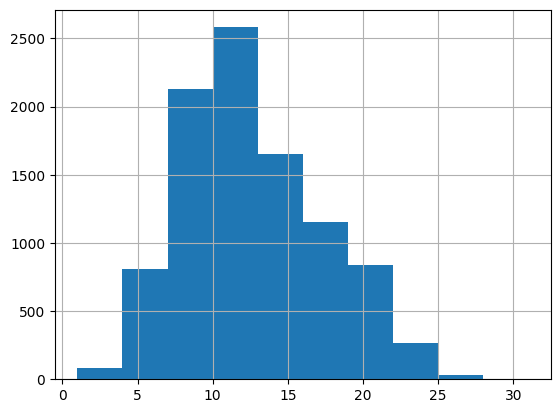

In [35]:
train_df['word_count'].hist()

<AxesSubplot: >

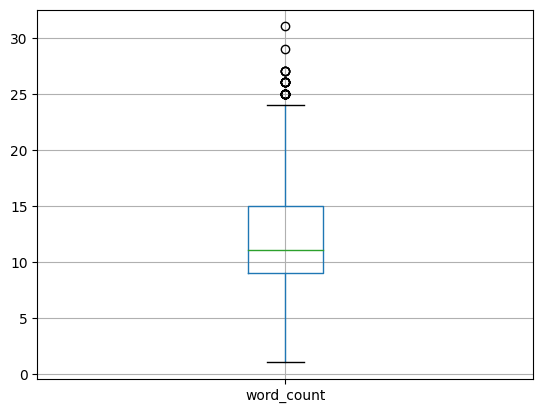

In [36]:
train_df.boxplot('word_count')
#we are not removinf any outlier because every tweet is independent

In [37]:
# Frequency of all words
all_words = ' '.join(train_df['text']).split()

In [38]:
#Create a DataFrane of all words and their frequencies
wordFreq = pd.Series(all_words).value_counts()

In [39]:
# List of me most common words in all tweets
wordFreq.sort_values(ascending=False)[0:15]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
at      539
as      528
is      526
by      414
up      388
dtype: int64

In [40]:
wordFreq.index[0:15]

Index(['to', 'the', 'of', '-', 'in', 'on', 'for', 'a', 'and', 'The', 'at',
       'as', 'is', 'by', 'up'],
      dtype='object')

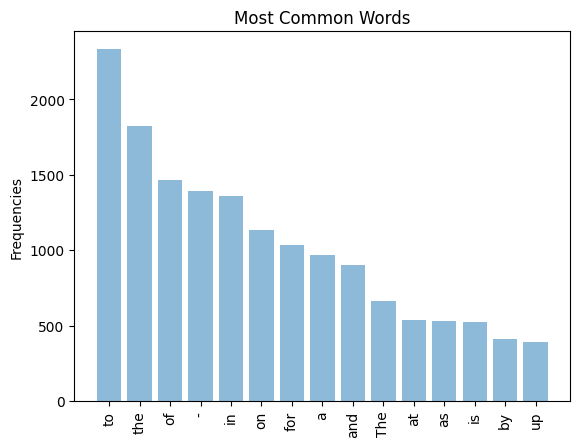

In [41]:
x_labels = wordFreq.index[0:15]
values = wordFreq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(y_pos, x_labels)
plt.ylabel('Frequencies')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing - Exemple 1: Stop Words

In [42]:
#Remove Punctuation
punctuation = list(set(string.punctuation))
punctuation[:5]

['.', ')', '@', '&', '{']

In [43]:
all_words_noPunctuation = [word.upper() for word in all_words if word not in punctuation]
all_words_noPunctuation[:10]

['$BYND',
 'JPMORGAN',
 'REELS',
 'IN',
 'EXPECTATIONS',
 'ON',
 'BEYOND',
 'MEAT',
 'HTTPS://T.CO/BD0XBFGJKT',
 '$CCL']